### glass

In [97]:
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report,log_loss
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.pipeline import  Pipeline


In [22]:
data = pd.read_csv(r"D:\Cases\Glass_Identification\Glass.csv")

In [23]:
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,building_windows_float_processed
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,building_windows_float_processed
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,building_windows_float_processed
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,building_windows_float_processed
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,building_windows_float_processed
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,headlamps
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,headlamps
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,headlamps
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,headlamps


In [24]:
y= data['Type']
x = data.drop('Type',axis =1)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 25,stratify = y)

### LDA

In [16]:
lda = LinearDiscriminantAnalysis().set_output(transform = 'pandas')
x_trn_lda = lda.fit_transform(x_train,y_train)
x_tst_lda = lda.transform(x_test)

In [18]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_trn_lda,y_train)
pred = lr.predict(x_tst_lda)

In [20]:
print(classification_report(y_test,pred))

                                      precision    recall  f1-score   support

    building_windows_float_processed       0.58      0.71      0.64        21
building_windows_non_float_processed       0.67      0.61      0.64        23
                          containers       0.50      0.50      0.50         4
                           headlamps       1.00      0.89      0.94         9
                           tableware       1.00      0.67      0.80         3
     vehicle_windows_float_processed       0.25      0.20      0.22         5

                            accuracy                           0.65        65
                           macro avg       0.67      0.60      0.62        65
                        weighted avg       0.66      0.65      0.65        65



In [ ]:
pipe = Pipeline([(),()])

### QDA

In [29]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()

In [ ]:
x_trn_transformed = pipeline.named_steps['pca'].transform(x_train)
x_tst_transformed = pipeline.named_steps['pca'].transform(x_test)

In [31]:
qda.fit(x_train, y_train)
x_trn_lda = qda.transform(x_train)
x_tst_lda = qda.transform(x_test)

C:\Users\dai\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
C:\Users\dai\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
C:\Users\dai\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 2 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
C:\Users\dai\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 3 is not full

AttributeError: 'QuadraticDiscriminantAnalysis' object has no attribute 'transform'

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_trn_lda, y_train)
pred = lr.predict(x_tst_lda)
print(classification_report(y_test, pred))

# Decision Tree

### HR

In [32]:
import pandas as pd
import sklearn
import numpy as np
from sklearn.tree import DecisionTreeClassifier,plot_tree
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import make_column_transformer,ColumnTransformer,make_column_selector
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report
import matplotlib.pyplot as plt

In [33]:
hr=pd.read_csv(r"D:\HR_comma_sep.csv")
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.10,0.77,6,247,4,0,1,0,sales,low
3,0.92,0.85,5,259,5,0,1,0,sales,low
4,0.89,1.00,5,224,5,0,1,0,sales,low


In [34]:
x,y=hr.drop('left',axis=1),hr['left']
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [35]:
trns=ColumnTransformer(transformers=[
    ('ohe',OneHotEncoder(sparse_output=False),make_column_selector(dtype_include='object'))
],remainder='passthrough',verbose_feature_names_out=False)
trns=trns.set_output(transform='pandas')
X_train_trns=trns.fit_transform(X_train)
X_test_trns=trns.transform(X_test)

In [36]:
ohe=OneHotEncoder(sparse_output=False,drop='first').set_output(transform='pandas')
trns=make_column_transformer((ohe,make_column_selector(dtype_include='object')),remainder='passthrough',verbose_feature_names_out=False).set_output(transform='pandas')
X_train_trns=trns.fit_transform(X_train)
X_test=trns.transform(X_test)

In [42]:
from sklearn.metrics import f1_score

depths = [i for i in range(3,12)]
depths.append(None)
leaves= [1,50,75,100,150]
splits= [2,50,75,100,150]
scores = []
for d in depths:
    for l in leaves:
        for s in splits:
            dtc = DecisionTreeClassifier(random_state = 25,max_depth = d,min_samples_leaf = l, min_samples_split = s)
            dtc.fit(X_train_trns,y_train)
            y_pred=dtc.predict(X_test)
            scores.append([d,l,s,f1_score(y_test,y_pred,pos_label = 1)])
df_scores = pd.DataFrame(scores,columns = ['depth','leaf','split','score'])
df_scores.sort_values('score',ascending = False)

,depth,leaf,split,score
175,10.0,1,2,0.962582
200,11.0,1,2,0.961341
125,8.0,1,2,0.959020
150,9.0,1,2,0.958763
225,NaN,1,2,0.958220
...,...,...,...,...
20,3.0,150,2,0.889811
21,3.0,150,50,0.889811
23,3.0,150,100,0.889811
22,3.0,150,75,0.889811


In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3415
           1       0.94      0.88      0.91      1084

    accuracy                           0.96      4499
   macro avg       0.95      0.93      0.94      4499
weighted avg       0.96      0.96      0.96      4499



In [44]:
hr.select_dtypes(include=object).columns

Index(['Department', 'salary'], dtype='object')

[Text(0.5, 0.8333333333333334, 'satisfaction_level <= 0.465\ngini = 0.361\nsamples = 10496\nvalue = [8013, 2483]\nclass = 0'),
 Text(0.25, 0.5, 'number_project <= 2.5\ngini = 0.48\nsamples = 2953\nvalue = [1182, 1771]\nclass = 1'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.217\nsamples = 1213\nvalue = [150, 1063]\nclass = 1'),
 Text(0.375, 0.16666666666666666, 'gini = 0.483\nsamples = 1740\nvalue = [1032, 708]\nclass = 0'),
 Text(0.75, 0.5, 'time_spend_company <= 4.5\ngini = 0.171\nsamples = 7543\nvalue = [6831, 712]\nclass = 0'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.03\nsamples = 6149\nvalue = [6056, 93]\nclass = 0'),
 Text(0.875, 0.16666666666666666, 'gini = 0.494\nsamples = 1394\nvalue = [775.0, 619.0]\nclass = 0')]

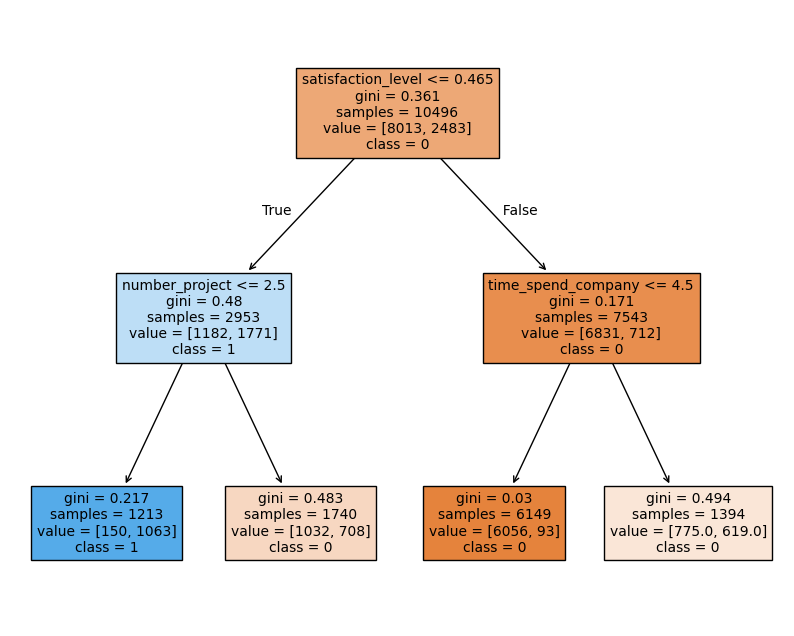

In [45]:
plt.figure(figsize=(10,8))
plot_tree(model,feature_names=X_train_trns.columns.to_list(),class_names=[str(x) for x in y_test.unique()],filled=True,fontsize=10)

### Building the best model on whole data

In [46]:
best_tree = DecisionTreeClassifier(random_state = 25,max_depth = 9,min_samples_leaf = 1,min_samples_split = 2)
x_trns = trns.fit_transform(x)
best_tree.fit(x_trns,y)

,criterion,'gini'
,splitter,'best'
,max_depth,9
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,25
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [47]:
df_imp = pd.DataFrame({'features':list(x_trns.columns),'imp':best_tree.feature_importances_})
df_imp.sort_values('imp',ascending = False)

,features,imp
11,satisfaction_level,0.519846
15,time_spend_company,0.148528
12,last_evaluation,0.143526
13,number_project,0.108963
14,average_montly_hours,0.074325
9,salary_low,0.002113
10,salary_medium,0.000770
8,Department_technical,0.000612
7,Department_support,0.000431
0,Department_RandD,0.000373


In [48]:
from pandas import Index

Index(['Department_RandD','Department_accounting'])

Index(['Department_RandD', 'Department_accounting'], dtype='object')

### glass

In [66]:
data = pd.read_csv(r"D:\Cases\Glass_Identification\Glass.csv")

In [67]:
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,building_windows_float_processed
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,building_windows_float_processed
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,building_windows_float_processed
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,building_windows_float_processed
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,building_windows_float_processed
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,headlamps
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,headlamps
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,headlamps
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,headlamps


In [68]:
x,y=data.drop('Type',axis=1),data['Type']
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [73]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [74]:
x_train

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
78,1.51613,13.92,3.52,1.25,72.88,0.37,7.94,0.00,0.14
21,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.00,0.00
154,1.51694,12.86,3.58,1.31,72.61,0.61,8.79,0.00,0.00
74,1.51596,13.02,3.56,1.54,73.11,0.72,7.90,0.00,0.00
181,1.51888,14.99,0.78,1.74,72.50,0.00,9.95,0.00,0.00
...,...,...,...,...,...,...,...,...,...
135,1.51789,13.19,3.90,1.30,72.33,0.55,8.44,0.00,0.28
206,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.00
134,1.51811,13.33,3.85,1.25,72.78,0.52,8.12,0.00,0.00
92,1.51588,13.12,3.41,1.58,73.26,0.07,8.39,0.00,0.19


In [79]:
from sklearn.metrics import log_loss

depths = [2,3,4,5]
depths.append(None)
leaves= [2,5,10,20]
splits= [2,5,10,20]
scores = []
for d in depths:
    for l in leaves:
        for s in splits:
            dtc = DecisionTreeClassifier(random_state = 25,max_depth = d,min_samples_leaf = l, min_samples_split = s)
            dtc.fit(X_train_trns,y_train)
            y_pred=dtc.predict_proba(X_test)
            scores.append([d,l,s,log_loss(y_test,y_pred)])
df_scores = pd.DataFrame(scores,columns = ['depth','leaf','split','score'])
df_scores.sort_values('score',ascending = False)

,depth,leaf,split,score
64,NaN,2,2,9.025201
65,NaN,2,5,7.958821
66,NaN,2,10,6.963429
67,NaN,2,20,5.489166
68,NaN,5,2,4.816088
...,...,...,...,...
9,2.0,10,5,1.525323
3,2.0,2,20,1.525323
7,2.0,5,20,1.525323
10,2.0,10,10,1.525323


### chossing best model

In [55]:
best_tree = DecisionTreeClassifier(random_state=25, max_depth=9, min_samples_leaf=1, min_samples_split=2)
x_trns = trns.fit_transform(x)
best_tree.fit(x_trns, y)
df_imp = pd.DataFrame({'features': list(x_trns.columns), 'imp': best_tree.feature_importances_})
df_imp.sort_values('imp', ascending=False)


,features,imp
11,satisfaction_level,0.519846
15,time_spend_company,0.148528
12,last_evaluation,0.143526
13,number_project,0.108963
14,average_montly_hours,0.074325
9,salary_low,0.002113
10,salary_medium,0.000770
8,Department_technical,0.000612
7,Department_support,0.000431
0,Department_RandD,0.000373


## Decision tree log loss

In [114]:
df=pd.read_csv(r"D:\Cases\Glass_Identification\Glass.csv")
x=df.drop('Type',axis=1)
y=df['Type']

X_train,X_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.30)

In [122]:
std=StandardScaler()
model=DecisionTreeClassifier(random_state=42)
pipe=Pipeline(steps=[
    ('standard',std),
    ('classifier',model)
])

In [126]:
param_grid = {
    # Step name 'classifier' followed by __ and parameter name
    'classifier__max_depth': [None, 2, 3, 4, 5],
    'classifier__min_samples_split': [2, 5, 10, 20],
    'classifier__min_samples_leaf': [1, 5, 10, 20]
}

grid_search=GridSearchCV(estimator=pipe,param_grid=param_grid,cv=5,scoring='neg_log_loss',n_jobs=-1,verbose=1)

In [127]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'classifier__max_depth': [None, 2, ...], 'classifier__min_samples_leaf': [1, 5, ...], 'classifier__min_samples_split': [2, 5, ...]}"
,scoring,'neg_log_loss'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [133]:
best_pipeline = grid_search.best_estimator_
best_classifier=best_pipeline.named_steps['classifier']
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns.to_list(),
    'Importance': best_classifier.feature_importances_
})
feature_importance_df.sort_values(by='Importance',ascending=False)

,Feature,Importance
6,Ca,0.653261
4,Si,0.346739
0,RI,0.000000
2,Mg,0.000000
1,Na,0.000000
3,Al,0.000000
5,K,0.000000
7,Ba,0.000000
8,Fe,0.000000
